<a href="https://colab.research.google.com/github/MoizAhmed2517/Deep_Learning_Projects/blob/main/Intro_to_CNN_and_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Vision

## Getting the Data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-19 14:12:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.5s    

2022-11-19 14:12:08 (19.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Above loaded data set is for binary CNN. 

## Inspect the Data

A very crucial step becomming one with the data means visualize it according to deep learning model requirement

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/pizza 

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
# checking the number of files in pizza_steak directory

In [6]:
# checking number of files in pizza_steak training steak folder
import os
dirPath = '/content/pizza_steak/train/steak'
count = 0
for path in os.listdir(dirPath):
  if os.path.isfile(os.path.join(dirPath, path)):
    count+=1
print('Number of Files:', count)

Number of Files: 750


In [7]:
dirPath = '/content/pizza_steak/train/pizza'
count = 0
for path in os.listdir(dirPath):
  if os.path.isfile(os.path.join(dirPath, path)):
    count+=1
print('Number of Files:', count)

Number of Files: 750


In [8]:
# Using os.walk() function istead of running multiple functions

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


### We have 250 images in testing and 750 images in training dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [10]:
# Visualizing our image

steak = os.listdir("pizza_steak/train/steak")
pizza = os.listdir("pizza_steak/train/pizza")

In [11]:
import pathlib

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [12]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (384, 512, 3)


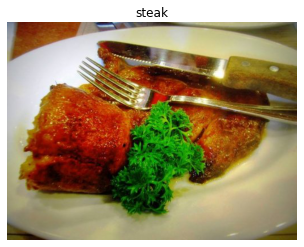

In [13]:
img = view_random_image("pizza_steak/train", "steak")

### Different shape in random Images

Scaling to be applied before passing it to neural network. and images to be same size.

In [14]:
# Converting image into tensor

tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 97, 113, 138],
        [ 98, 113, 136],
        [101, 113, 135],
        ...,
        [ 93,  99,  97],
        [ 93,  99,  99],
        [ 93,  99,  99]],

       [[103, 119, 144],
        [104, 119, 142],
        [107, 119, 141],
        ...,
        [ 91,  97,  95],
        [ 94, 100, 100],
        [ 96, 102, 102]],

       [[110, 126, 149],
        [112, 127, 150],
        [114, 126, 148],
        ...,
        [ 89,  95,  93],
        [ 95, 101, 101],
        [100, 106, 106]],

       ...,

       [[ 86,  76,  25],
        [ 87,  77,  26],
        [ 89,  79,  26],
        ...,
        [ 84,  68,   9],
        [ 84,  68,   9],
        [ 84,  68,   9]],

       [[ 86,  76,  27],
        [ 87,  77,  28],
        [ 87,  77,  26],
        ...,
        [ 83,  67,   8],
        [ 83,  66,  10],
        [ 84,  67,  11]],

       [[ 86,  75,  29],
        [ 85,  74,  28],
        [ 84,  74,  25],
        ...,
        [ 83,  66,  1

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Building a CNN (same as tiny VGG on the CNN explainer Website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 223ms/step - loss: 0.5652 - accuracy: 0.7180 - val_loss: 0.3624 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4181 - accuracy: 0.8167 - val_loss: 0.3554 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3876 - accuracy: 0.8367 - val_loss: 0.3233 - val_accuracy: 0.8860
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3359 - accuracy: 0.8647 - val_loss: 0.3615 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.2795 - accuracy: 0.8927 - val_loss: 0.3076 - val_accuracy: 0.8800


In [16]:
#Trying above same model like ANN and checking what will be the result

In [17]:
tf.random.set_seed(42)

#create a model to replicate the Tf ANN model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 1.6052 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    # tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 3.0883 - accuracy: 0.6207 - val_loss: 0.5563 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.7538 - accuracy: 0.7153 - val_loss: 0.9643 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 1.0679 - accuracy: 0.7033 - val_loss: 0.9870 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5706 - accuracy: 0.7740 - val_loss: 0.5203 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5380 - accuracy: 0.7733 - val_loss: 0.6858 - val_accuracy: 0.6880


In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Improved model_3 with increasing complexity by adding layer and hidden unit size and trainable parameters are 15,073,201 which are too much. And on this basis we recieved only 78% accuracy which is worst as compare with Tiny VGG model.

In [23]:
# Breaking CNN to improve its efficiency:

Image shape: (384, 512, 3)
Image shape: (382, 512, 3)


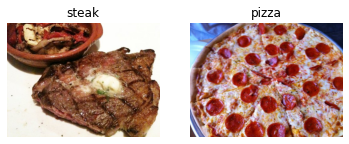

In [24]:
# 1) Becoming one with the data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train", "pizza") 

In [56]:
# 2) Preprocess the data (prepare it for a model)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Creating batches: A small subset of data rather than looking all samples at a time. (It take 32 at a time. 32 bit-processing.# use this comand for checking your gpu !nvidia-smi)
# Trying to learn at a time is not actually good way. Learn bit by bit to so it can be improve in next iteration and also improve your health. said by Yann LeCun (Father of CNN)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode="binary")
validation_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [57]:
images, labels = train_data.next() #get the next batch of images/label in train_data
len(images), len(labels)

(32, 32)

In [58]:
images[:2], images[0].shape

(array([[[[0.03137255, 0.1254902 , 0.23529413],
          [0.01568628, 0.13333334, 0.24313727],
          [0.0509804 , 0.19607845, 0.29803923],
          ...,
          [0.7176471 , 0.86666673, 0.90196085],
          [0.56078434, 0.7490196 , 0.78823537],
          [0.454902  , 0.6666667 , 0.7137255 ]],
 
         [[0.03137255, 0.1137255 , 0.21960786],
          [0.05882353, 0.16862746, 0.2627451 ],
          [0.01960784, 0.16078432, 0.25490198],
          ...,
          [0.4666667 , 0.5882353 , 0.60784316],
          [0.60784316, 0.7607844 , 0.78823537],
          [0.654902  , 0.8313726 , 0.854902  ]],
 
         [[0.06666667, 0.15294118, 0.24705884],
          [0.08627451, 0.18823531, 0.2784314 ],
          [0.05490196, 0.18039216, 0.2627451 ],
          ...,
          [0.74509805, 0.83921576, 0.8470589 ],
          [0.5921569 , 0.7058824 , 0.72156864],
          [0.49803925, 0.63529414, 0.6509804 ]],
 
         ...,
 
         [[0.07843138, 0.12156864, 0.13725491],
          [0.07843

In [28]:
# 3) Creating a CNN model

In [29]:
# A baseline is a simple model or existing result that you setup when building a model. Pro Tip: Start with simple CNN

In [59]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.9979 - accuracy: 0.6127 - val_loss: 0.4985 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4915 - accuracy: 0.7760 - val_loss: 0.4523 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4138 - accuracy: 0.8187 - val_loss: 0.3743 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3342 - accuracy: 0.8747 - val_loss: 0.4124 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.2265 - accuracy: 0.9300 - val_loss: 0.3516 - val_accuracy: 0.8400


In [60]:
model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 220, 220, 10)      760       
                                                                 
 conv2d_29 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 conv2d_30 (Conv2D)          (None, 216, 216, 10)      910       
                                                                 
 flatten_11 (Flatten)        (None, 466560)            0         
                                                                 
 dense_16 (Dense)            (None, 1)                 466561    
                                                                 
Total params: 469,141
Trainable params: 469,141
Non-trainable params: 0
_________________________________________________________________


In [61]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 11s 219ms/step - loss: 0.9613 - accuracy: 0.6133 - val_loss: 0.5355 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5397 - accuracy: 0.7447 - val_loss: 0.4724 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5156 - accuracy: 0.7440 - val_loss: 0.4247 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4328 - accuracy: 0.8127 - val_loss: 0.4422 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4015 - accuracy: 0.8213 - val_loss: 0.4813 - val_accuracy: 0.7880


In [62]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Val Loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Val Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

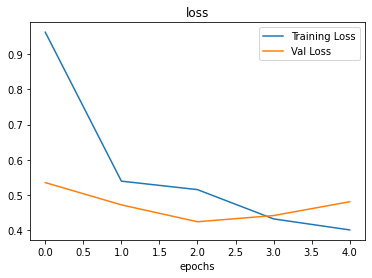

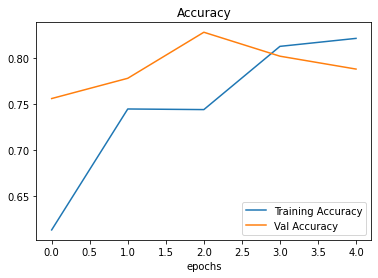

In [63]:
plot_loss_curves(history_5)

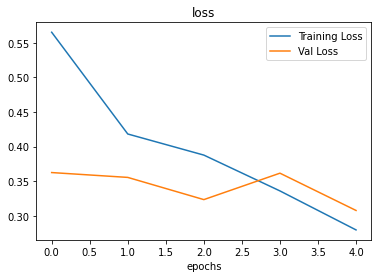

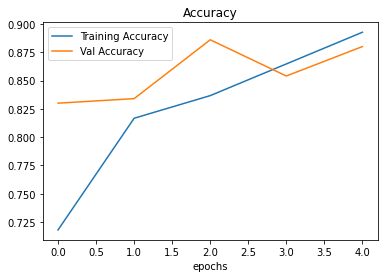

In [49]:
plot_loss_curves(history_1)

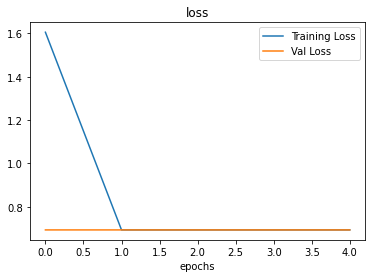

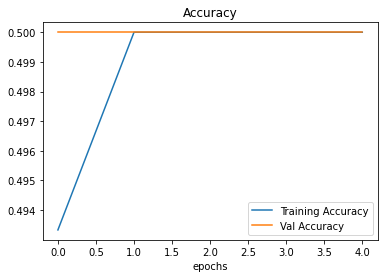

In [42]:
plot_loss_curves(history_2)

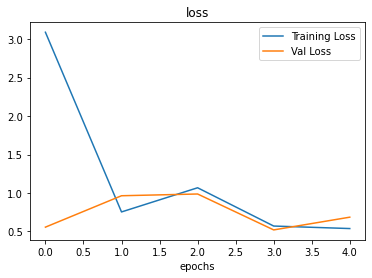

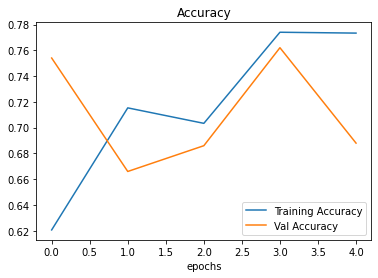

In [64]:
plot_loss_curves(history_3)

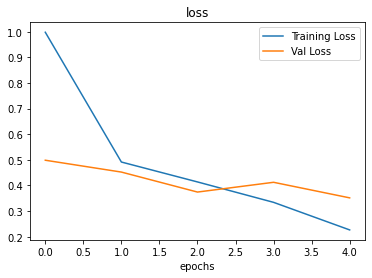

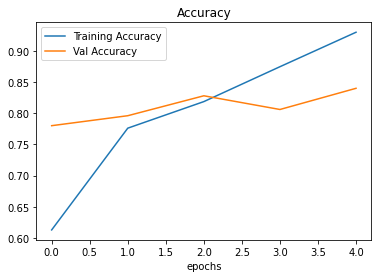

In [65]:
plot_loss_curves(history_4)

In [51]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [66]:
tf.random.set_seed(42)

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 11s 211ms/step - loss: 0.6230 - accuracy: 0.6353 - val_loss: 0.4905 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4796 - accuracy: 0.7747 - val_loss: 0.3989 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4185 - accuracy: 0.8140 - val_loss: 0.3558 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3935 - accuracy: 0.8320 - val_loss: 0.3227 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3708 - accuracy: 0.8373 - val_loss: 0.3266 - val_accuracy: 0.8500


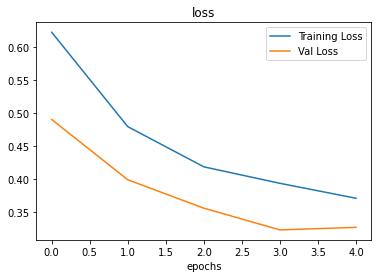

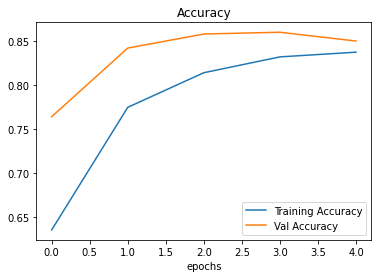

In [67]:
plot_loss_curves(history_6)

In [68]:
model_6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 26, 26, 10)     

In [69]:
# Creating ImageDataGenerator training instance with data Augementation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Creating ImageDataGenerator training instance without data Augementation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Creating ImageDataGenerator testing instance without data Augementation
test_datagen = ImageDataGenerator(rescale=1/255.) 

In [70]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      class_mode="binary",
                                                                      target_size=(224, 224, 3),
                                                                      batch_size=32,
                                                                      shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224, 3),
                                               batch_size=32,
                                               shuffle=False,
                                               class_mode="binary")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224, 3),
                                               batch_size=32,
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
